# Space Mice Genes!
## Upstream Regulator Analysis

----------------------

Author: Mikayla Webster (13webstermj@gmail.com)

Date: 21st March, 2018

----------------------
<a id='toc'></a>
## Table of Contents
1. [Background](#background)
2. [Import packages](#import)
3. [Load Networks](#load)
4. [Enrichment Analysis](#enrich)
6. [Activation State Prediction](#active)
8. [Visualization](#vis)

## Background
<a id='background'></a>

The set of DEGs analyzed in this notebook come from an experiment performed by NASA called the [Rodent Research Project on the ISS](https://genelab-data.ndc.nasa.gov/genelab/accession/GLDS-48). The tissues sampled for this experiment were taken from the livers of mice who experienced space flight. 

## Import packages
<a id='import'></a>

In [15]:
# import upstream regulator module
import sys
code_path = '../../network_bio_toolkit'
sys.path.append(code_path)
import Upstream
reload(Upstream)

<module 'Upstream' from '../../network_bio_toolkit\Upstream.pyc'>

In [16]:
# User preferences
symbol = 'symbol'
entrez = 'entrez'

human = 'human'
mouse = 'mouse'

ura = Upstream.Upstream(gene_type = symbol, species = mouse)

## Load Networks
<a id='load'></a>

In [17]:
# transcription factors
ura.easy_load_TF_list('../../TF_databases/TF_database_URA.csv')
TF_list = ura.get('TF_list')
print "Number of TF's: " + str(len(TF_list))

Number of TF's: 3983


In [18]:
# background network
filename = "../../background_networks/10090.protein.actions.v10.5.txt"
confidence_filter = 400
ura.load_STRING_to_digraph(filename, confidence_filter)
DG_TF = ura.get('DG_TF')

print "\nNumber of interactions: " + str(len(list(DG_TF.edges())))

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-7303...done.
Finished.
36 input query terms found dup hits:
	[(u'ENSMUSP00000010241', 2), (u'ENSMUSP00000010248', 2), (u'ENSMUSP00000095200', 2), (u'ENSMUSP00000
155 input query terms found no hit:
	[u'ENSMUSP00000036849', u'ENSMUSP00000097354', u'ENSMUSP00000097358', u'ENSMUSP00000137522', u'ENSMU
Pass "returnall=True" to return complete lists of duplicate or missing query terms.

Number of interactions: 24701


In [19]:
# differentially expressed genes
DEG_filename = "../../DEG_databases/DE_CoeffspaceFlight - groundControl_glds48_20180312.csv" 
ura.create_DEG_list(DEG_filename, p_value_filter = 0.05, sep = ',')

DEG_list = ura.get('DEG_list')
print "Number of DEG's: " + str(len(DEG_list))

Number of DEG's: 181


## Enrichment Analysis
<a id='enrich'></a>

In [20]:
# Enrichment of every TF with respect to its targets
ura.tf_target_enrichment_calc()

# Enrichment of TF's themselves
ura.tf_enrichment_calc()   
ura.get('tf_enrichment')

TF_ENRICHMENT    1.476166e-10
dtype: float64

## Activation State Prediction
<a id='active'></a>

In [21]:
ura.tf_zscore(bias_filter = 0.25)

In [22]:
top_values = ura.top_values(act=True, abs_value=True, top=5)
display(top_values)

,z-score,(adj) p-value,(log) fold change
Rora,2.000000,0.148817,0.325489
Fbxw11,2.000000,0.545442,0.188419
Btrc,2.000000,0.983205,0.009308
Per1,-2.000000,0.018291,-0.773709
Per2,-2.236068,0.396750,-0.874570


## Visualization
<a id='vis'></a>

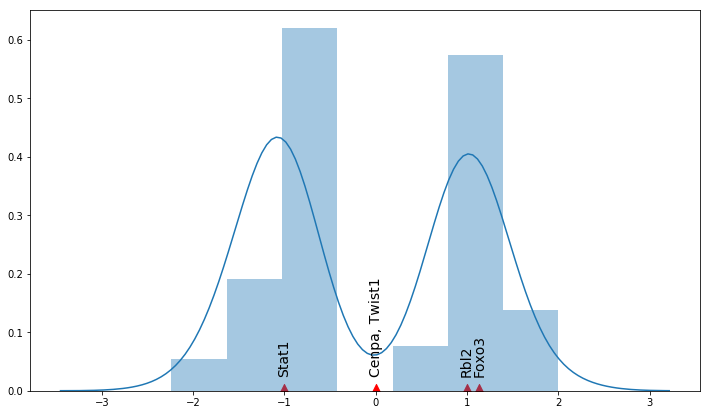

In [23]:
genes_to_rank = ['Stat1', 'Cenpa', 'Foxo3', 'Twist1', 'Rbl2']
ura.compare_genes(genes_to_rank, font_size = 14)

In [24]:
ura.vis_tf_network('Rora',
              directed_edges = True,
              color_non_DEGs = False,
              node_spacing = 900,
              graph_id = 2,
              tf_size_amplifier = 10)

In [25]:
# display subnetworks using visJS2jupyter
ura.vis_tf_network('Per1',
              color_non_DEGs = False,
              directed_edges = True,
              node_spacing = 1100,
              graph_id = 1,
              tf_size_amplifier = 10) 

In [13]:
# to write data to a csv file
#csv_filename = 'analysis_space.txt'
#ura.to_csv(csv_filename)